In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   

url = "https://github.com/R4gerBOT/A3/raw/main/reduced_file10000.xlsx"
sd = pd.read_excel(url, engine = 'openpyxl')

In [6]:
sd.head()

,Survey Year,Program Category,Region Served,Age Group,Sex,Transgender,Sexual Orientation,Hispanic Ethnicity,Race,Living Situation,...,No Insurance,Unknown Insurance Coverage,Medicaid Insurance,Medicaid Managed Insurance,Medicare Insurance,Private Insurance,Child Health Plus Insurance,Other Insurance,Criminal Justice Status,Three Digit Residence Zip Code
0,2015,SUPPORT,NEW YORK CITY REGION,ADULT,MALE,"NO, NOT TRANSGENDER",LESBIAN OR GAY,1,WHITE ONLY,OTHER LIVING SITUATION,...,0.0,0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,888
1,2015,OUTPATIENT,NEW YORK CITY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",BLACK ONLY,PRIVATE RESIDENCE,...,0.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,112
2,2015,OUTPATIENT,WESTERN REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,0.0,0,1.0,0,1.0,0.0,0.0,0.0,NaN,146
3,2015,OUTPATIENT,NEW YORK CITY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,1,OTHER,PRIVATE RESIDENCE,...,0.0,0,1.0,1,0.0,0.0,0.0,0.0,0.0,112
4,2015,OUTPATIENT,CENTRAL NY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,0.0,0,0.0,NOT APPLICABLE,0.0,1.0,0.0,0.0,0.0,131


In [ ]:
#sd.replace({"YES": 1, "NO": 0, "UNKNOWN": pd.NA}, inplace=True)
sd.shape

(10000, 67)

In [8]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 67 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Survey Year                       10000 non-null  int64  
 1   Program Category                  10000 non-null  object 
 2   Region Served                     10000 non-null  object 
 3   Age Group                         9998 non-null   object 
 4   Sex                               9982 non-null   object 
 5   Transgender                       9715 non-null   object 
 6   Sexual Orientation                9036 non-null   object 
 7   Hispanic Ethnicity                9798 non-null   object 
 8   Race                              10000 non-null  object 
 9   Living Situation                  9808 non-null   object 
 10  Household Composition             9612 non-null   object 
 11  Preferred Language                9938 non-null   object 
 12  Veter

In [ ]:
sd.isnull().sum()

Survey Year                         0
Program Category                    0
Region Served                       0
Age Group                           2
Sex                                18
                                 ... 
Private Insurance                 571
Child Health Plus Insurance       569
Other Insurance                   571
Criminal Justice Status           673
Three Digit Residence Zip Code      0
Length: 67, dtype: int64

In [10]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
print(sd.isnull().sum())

Survey Year                            0
Program Category                       0
Region Served                          0
Age Group                              2
Sex                                   18
Transgender                          285
Sexual Orientation                   964
Hispanic Ethnicity                   202
Race                                   0
Living Situation                     192
Household Composition                388
Preferred Language                    62
Veteran Status                       316
Employment Status                      0
Number Of Hours Worked Each Week       0
Education Status                     768
Special Education Services           147
Mental Illness                       127
Intellectual Disability              785
Autism Spectrum                      756
Other Developmental Disability       733
Alcohol Related Disorder             626
Drug Substance Disorder              596
Mobility Impairment Disorder         508
Hearing Visual I

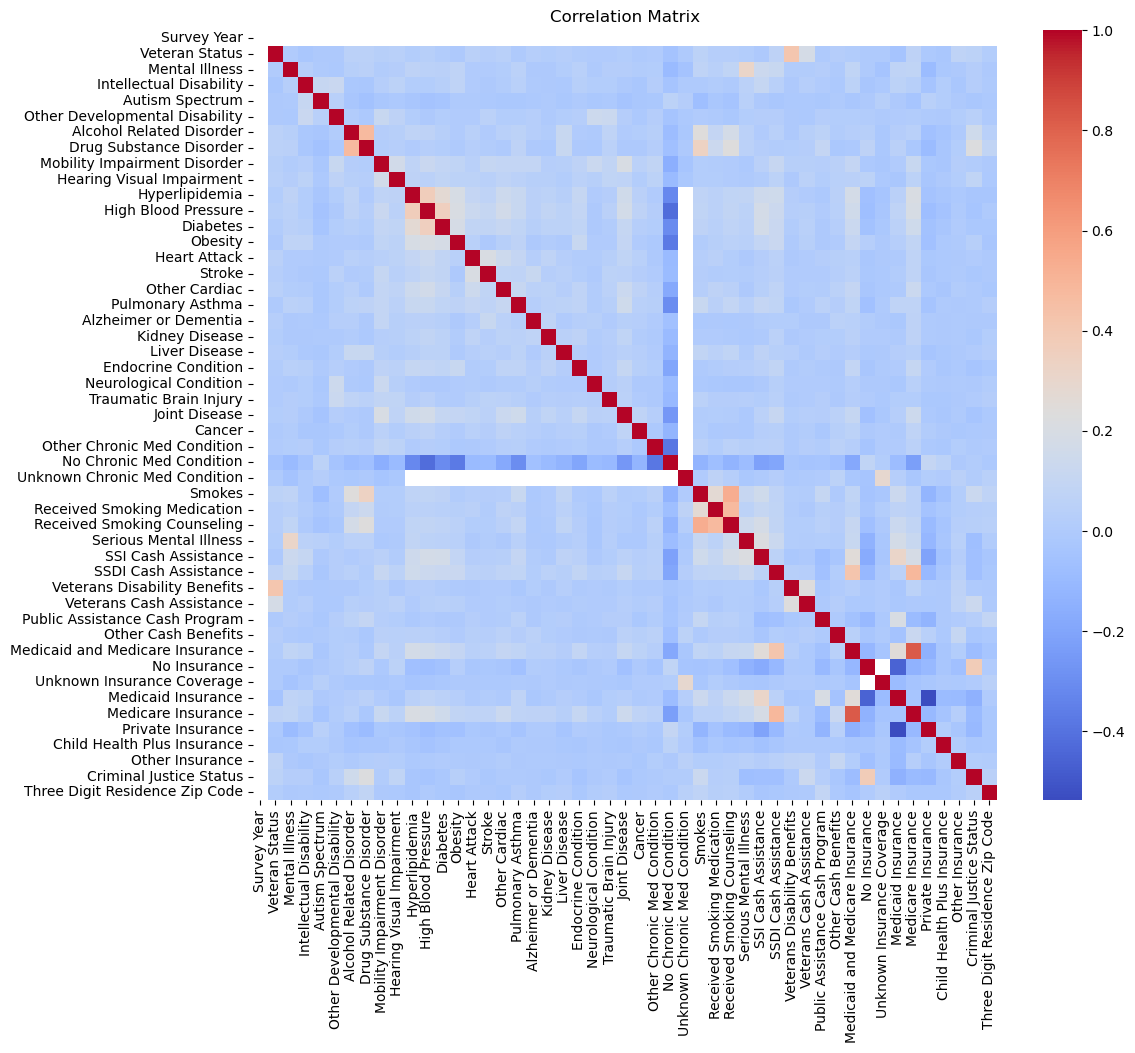

In [4]:
correlation_matrix = sd.corr(numeric_only=True) 
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True, annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.show()

In [2]:
#Separating
diseases = sd.iloc[:, 17:43]
demographics = pd.concat([sd.iloc[:,:17], sd.iloc[:,43:]], axis=1)
#Diseases
#Demographics


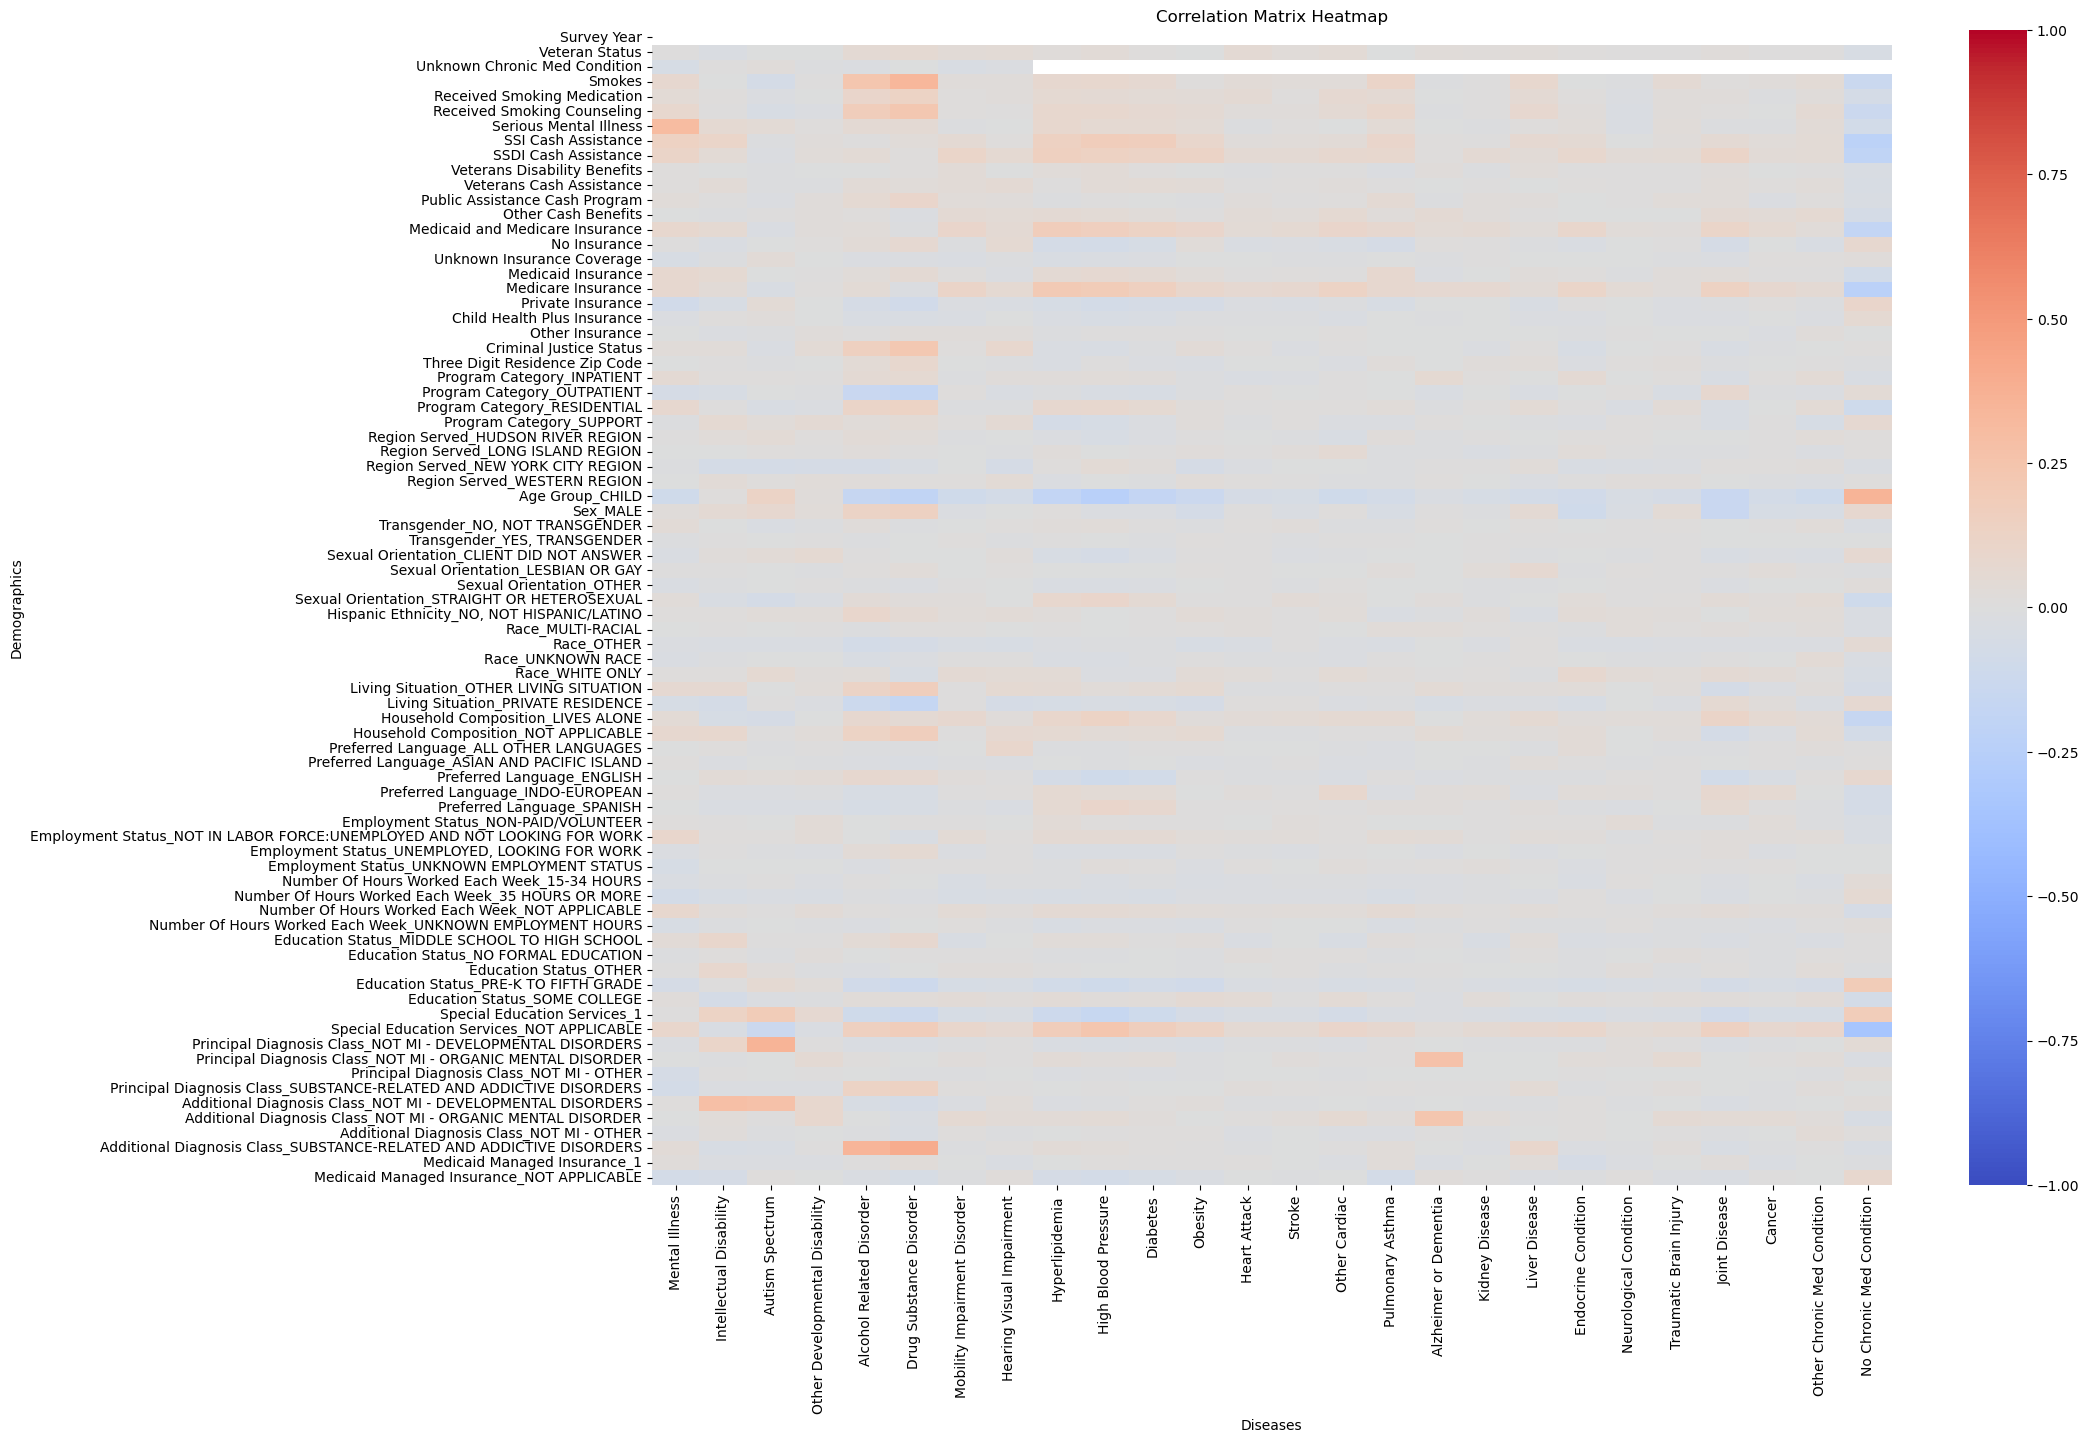

In [17]:
#Combine these 2 matrices
combined_sd = pd.concat([demographics, diseases], axis=1)
combined_sd_encoded = pd.get_dummies(combined_sd, drop_first=True)
correlation_matrix = combined_sd_encoded.corr()

common_demographics_columns = [col for col in pd.get_dummies(demographics, drop_first=True).columns if col in correlation_matrix.columns]
common_diseases_columns = [col for col in diseases.columns if col in correlation_matrix.columns]

# Create heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix.loc[common_demographics_columns, common_diseases_columns], annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Diseases')
plt.ylabel('Demographics')
plt.show()

In [ ]:
#print(correlation_matrix.columns)
#print(demographics.columns)
#print(diseases.columns)

In [31]:
#Combine these 2 matrices
'''combined_sd = pd.concat([demographics, diseases], axis=1)
combined_sd_encoded = pd.get_dummies(combined_sd, drop_first = True)
correlation_matrix = combined_sd_encoded.corr()

common_demographics_columns = [col for col in pd.get_dummies(demographics, drop_first=True).columns if col in correlation_matrix.columns]
common_diseases_columns = [col for col in diseases.columns if col in correlation_matrix.columns]

# Create heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix.loc[common_demographics_columns, common_diseases_columns], annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Diseases')
plt.ylabel('Demographics')
plt.show()'
'''
pass

In [28]:
columns_to_remove = ["Survey Year","Household Composition","Living Situation","Number Of Hours Worked Each Week","Other Developmental Disability","Other Chronic Med Condition",
                     "No Chronic Med Condition","Unknown Chronic Med Condition","Additional Diagnosis Class","SSI Cash Assistance","SSDI Cash Assistance","Veterans Disability Benefits",
                     "Veterans Cash Assistance","Public Assistance Cash Program","Other Cash Benefits","Special Education Services","Criminal Justice Status","Three Digit Residence Zip Code",'Mental Illness',
                     'Preferred Language', 'Education Status', 'Other Insurance']
sd_reduced = sd.drop(columns = columns_to_remove)

In [21]:
#sd_reduced.info()
#sd_reduced.shape

In [29]:
sd_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Program Category                 10000 non-null  object 
 1   Region Served                    10000 non-null  object 
 2   Age Group                        9998 non-null   object 
 3   Sex                              9982 non-null   object 
 4   Transgender                      9715 non-null   object 
 5   Sexual Orientation               9036 non-null   object 
 6   Hispanic Ethnicity               9798 non-null   object 
 7   Race                             10000 non-null  object 
 8   Veteran Status                   9684 non-null   float64
 9   Employment Status                10000 non-null  object 
 10  Intellectual Disability          9215 non-null   float64
 11  Autism Spectrum                  9244 non-null   float64
 12  Alcohol Related Dis

In [45]:
di2 = sd_reduced.iloc[:, 10:32]
de2 = pd.concat([sd_reduced.iloc[:,:10], sd_reduced.iloc[:,32:]], axis=1)

In [43]:
#diseases2.info()
#demographics2.info()

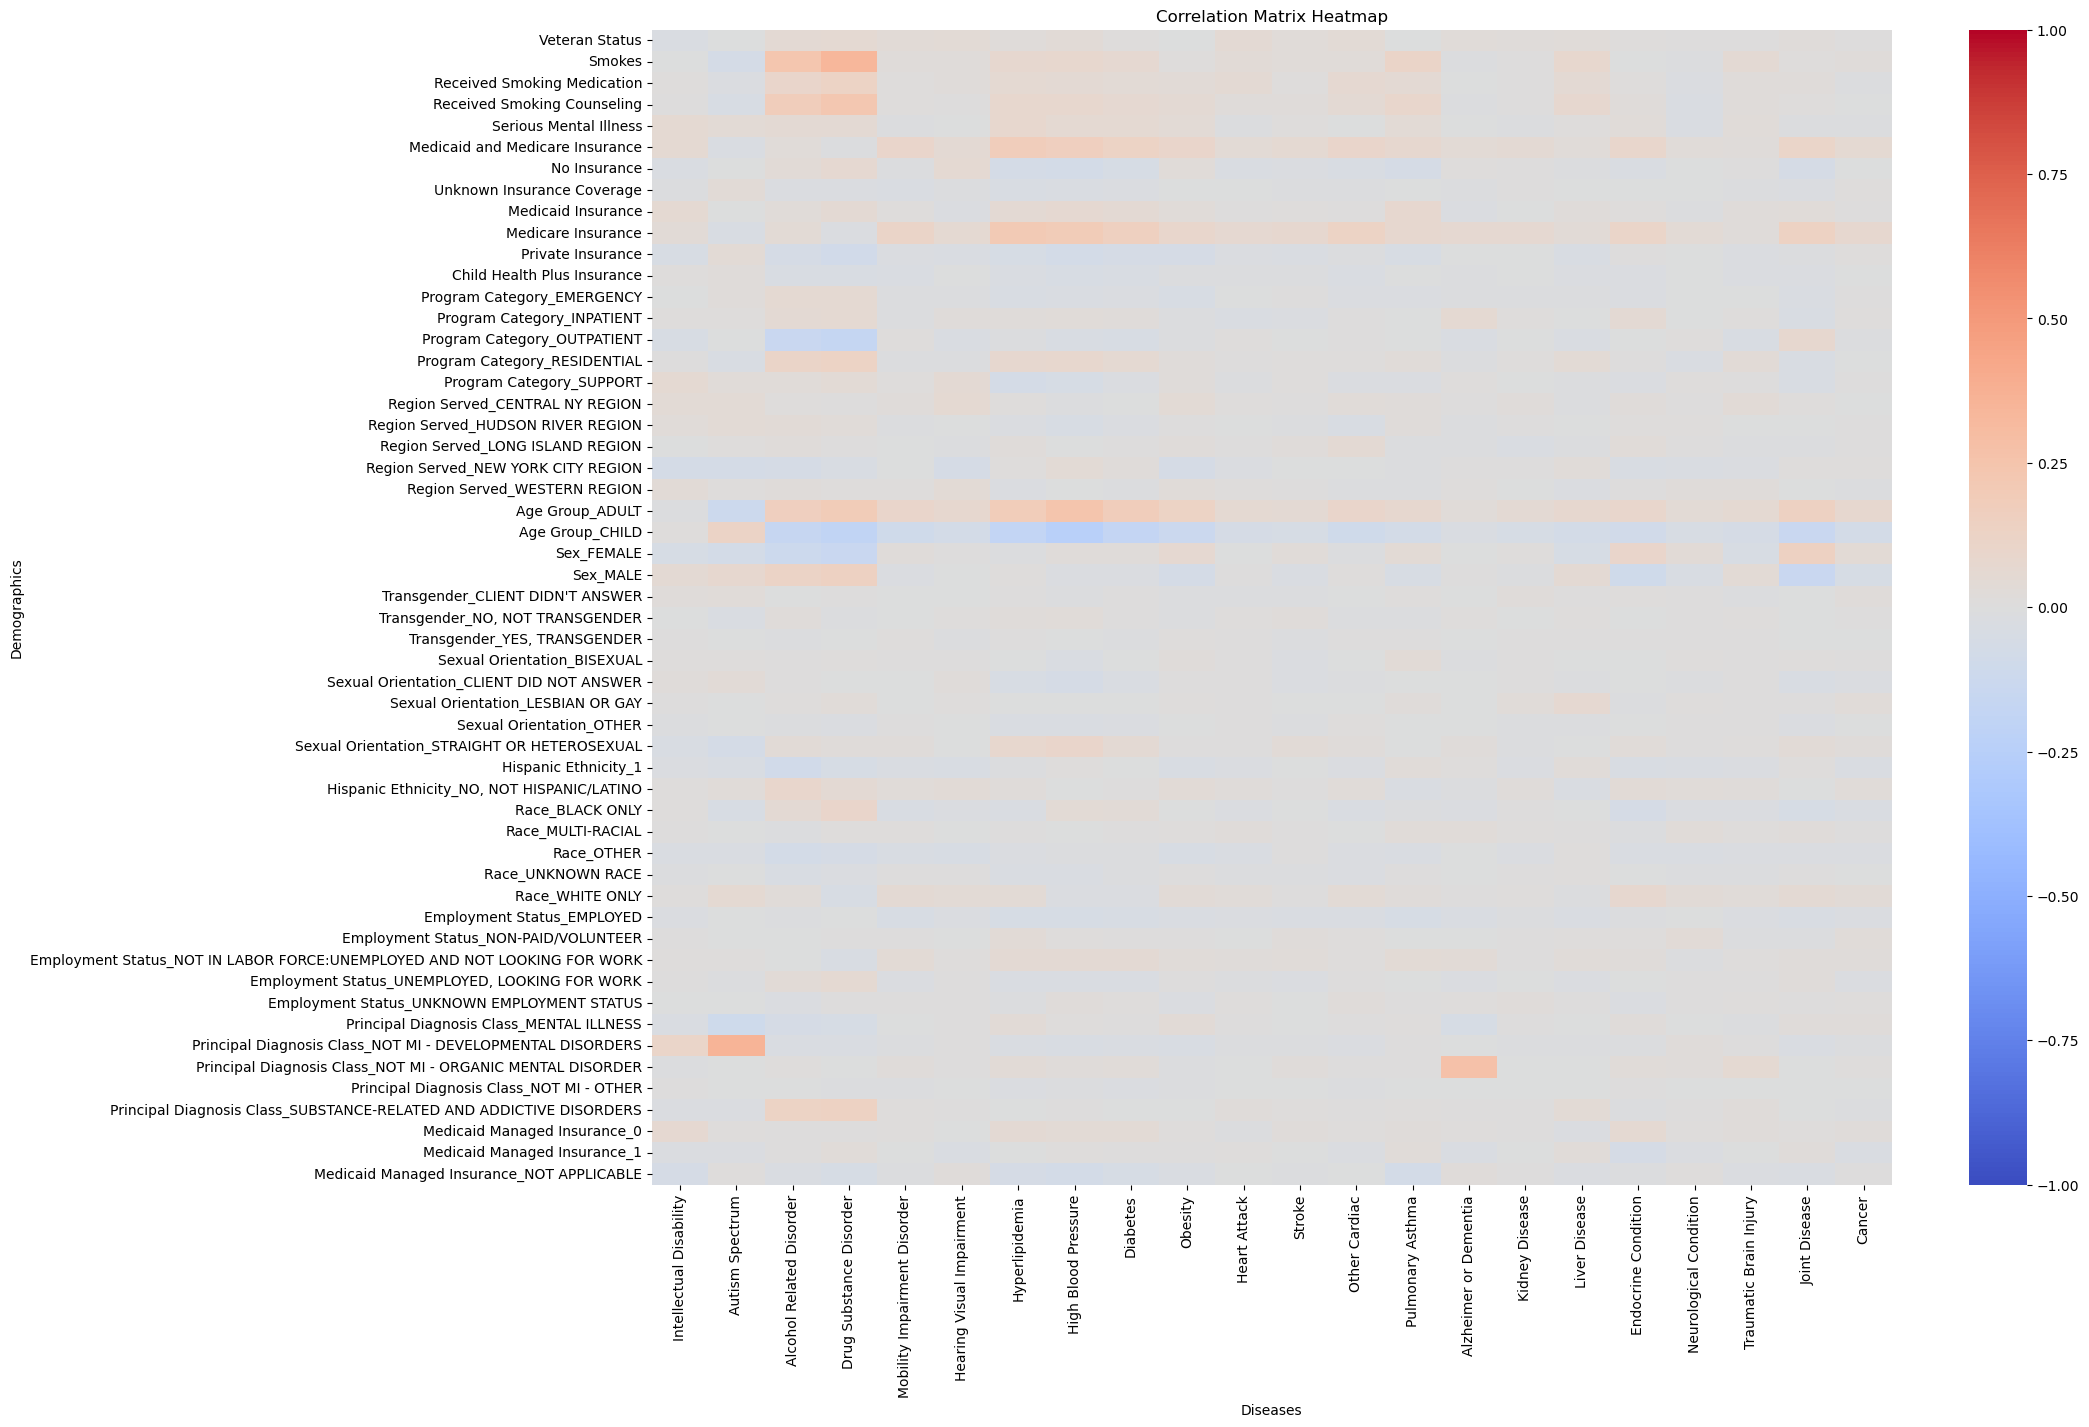

In [48]:
combined_reducedsd = pd.concat([de2, di2], axis=1)
combined_sd2_encoded = pd.get_dummies(combined_reducedsd)
correlation_matrix2 = combined_sd2_encoded.corr()

common_demographics_columns2 = [col for col in pd.get_dummies(de2).columns if col in correlation_matrix2.columns]
common_diseases_columns2 = [col for col in di2.columns if col in correlation_matrix2.columns]

# Create heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix2.loc[common_demographics_columns2, common_diseases_columns2], annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Diseases')
plt.ylabel('Demographics')
plt.show()

In [52]:
combined_sd2_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 76 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Veteran Status                                                            9684 non-null   float64
 1   Smokes                                                                    9303 non-null   float64
 2   Received Smoking Medication                                               9492 non-null   float64
 3   Received Smoking Counseling                                               9486 non-null   float64
 4   Serious Mental Illness                                                    9911 non-null   float64
 5   Medicaid and Medicare Insurance                                           9479 non-null   float64
 6   No Insurance                                                   

In [60]:
columns_to_remove2 = ['Medicaid Managed Insurance_0', 'Sexual Orientation_CLIENT DID NOT ANSWER', 'Employment Status_NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING FOR WORK',
                       'Employment Status_UNKNOWN EMPLOYMENT STATUS', "Transgender_CLIENT DIDN'T ANSWER", 'Unknown Insurance Coverage', 'Medicaid Managed Insurance_1', 'Medicaid Managed Insurance_NOT APPLICABLE']
sd_prilim = combined_sd2_encoded.drop(columns = columns_to_remove2)

In [64]:
sd_prilim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 68 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Veteran Status                                                       9684 non-null   float64
 1   Smokes                                                               9303 non-null   float64
 2   Received Smoking Medication                                          9492 non-null   float64
 3   Received Smoking Counseling                                          9486 non-null   float64
 4   Serious Mental Illness                                               9911 non-null   float64
 5   Medicaid and Medicare Insurance                                      9479 non-null   float64
 6   No Insurance                                                         9721 non-null   float64
 7   Medic